# Lecture 1 - (29/01/2026)

### Today's Topics:

- Python Recap: I/O, Dictionaries, Keywords, Linting
- Data Science Lifecycle
- Case Study: Why is my bus always late?
- Data Scope, Big Data, Accuracy
- Wrap Up

## Python Recap

### Iterating over files

Text files are sequences of lines separated by a newline (`\n`). When processing a file in Python, you can iterate line-by-line using a `for` loop.

Consider a climate change data file `ccdata1.txt` with columns:

- Year
- Global Average Temperature (°C)
- Global CO₂ Emissions (Giga-tons)

In [ ]:
# Example content of ccdata1.txt 
ccdata = '''1850 -0.37 2.24E-7
1860 -0.34 3.94E-7
1870 -0.28 6.6E-7
... (more lines) ...'''

print(ccdata)


1850 -0.37 2.24E-7
1860 -0.34 3.94E-7
1870 -0.28 6.6E-7
... (more lines) ...


#### What Is a Line?

- A **line** in a text file is the characters up to and including a newline (`\n`).
- Iterating through a file object yields **one line per iteration**, including the newline if present.

You can loop over each line in an open file using:


In [ ]:
for line in myFile:
    # process line

#### Splitting Lines into Fields

To process fields (like year or temperature), use `split()` on each line to get a list of strings.

In [ ]:
with open('ccdata1.txt', 'r') as ccfile:
    for line in ccfile:
        values = line.split()
        # values is now a list: [year, temp, emission]
        print(f"Year: {values[0]}, Temp: {values[1]}, CO2: {values[2]}")


### With Statements

When you open a file in Python, you normally write:

In [ ]:
f = open('somefile.txt')
# read or write
f.close()

However, if your program runs for a long time or crashes before `close()` is called, the file might stay open longer than needed. The with statement automates this open‑and‑close pattern.

A **context manager** automates common setup and teardown tasks. For files, that means:
- Opening the file at the start
- Closing it *automatically* when done

The general form is: `with <expression that returns a context manager> as <name>:`

In [ ]:
with open('mydata.txt') as md:
    print(md)
    for line in md:
        print(line)
    print(md)

Inside the with block, md is a file object. When the block ends, the file is automatically closed—even if an error occurred.


#### Why Use `with`?

- Makes code cleaner and easier to read.
- Helps avoid forgetting to close files.
- Python handles cleanup for you.
- Works with other resources (e.g., sockets, locks) that use context managers.

### Formatted literal strings

- Added in Python 3.6+: a nice way to format strings, called formatted literal strings (“f-strings”).
- You prefix a string with f or F and then place Python expressions inside {} within the string.
- When the string is evaluated, those expressions are evaluated and their values are inserted into the string.

In [3]:
name = "Alice"
age = 30
print(f"My name is {name} and I am {age} years old.")

My name is Alice and I am 30 years old.


In this case, the f before the opening quote signals it’s an f‑string. `{name}` and `{age}` are replaced with their current values.

#### Advantages to using f strings

- More readable than older formatting techniques like `%` or `str.format()`.
- Allows inline expressions, including arithmetic or function calls directly inside `{}`.
- Inside an f‑string, you can embed any valid Python expression

### Dictionaries

- Dictionaries are a built‑in Python mapping type.
- They are unordered collections that map keys to values.
- Dictionaries are associative — they use keys instead of numeric indices (sequential).
- A dictionary maps from a **key** (which must be immutable) to a **value** (which can be any Python object).

Starting with an Empty Dictionary

In [4]:
eng2sp = {}


Then add key-value pairs:

In [5]:
eng2sp['one'] = 'uno'
eng2sp['two'] = 'dos'
eng2sp['three'] = 'tres'


To look up a value, use the key inside square brackets:

In [6]:
print(eng2sp['two'])

dos


![image](https://media.geeksforgeeks.org/wp-content/uploads/Dictionary_inmage.jpg)

### Parameters

- parameter: A named entity in a function (or method) definition that specifies an argument (or in some cases, arguments) that the function can accept.
- Parameters are defined by the names that appear in a function definition, whereas arguments are the values actually passed to a function when calling it.
- Argument can be passed either positionally or as a keyword argument. This is the default kind of parameter:

In [7]:
def greet(name, greeting="Hello"):
    print(f"{greeting}, {name}!")

Optional vs Required Parameters

- Required parameters must be given a value when the function is called.
- Optional parameters can have a default value, so you don’t have to pass them every time.

Python even categorizes different kinds of parameters like:
- positional‑only
- keyword‑only
- *args (var‑positional)
- **kwargs (var‑keyword)

In [8]:
def demo(a, b, *args, **kwargs):
    print("a:", a)
    print("b:", b)
    print("extra positional:", args)
    print("extra keyword:", kwargs)

demo(1, 2, 3, 4, x=10, y=20)


a: 1
b: 2
extra positional: (3, 4)
extra keyword: {'x': 10, 'y': 20}


### Linting

- `linter`: a tool that flags errors and stylistic issues.
- Using Pylint: a static code analysis tool for the Python.
- It follows the style recommended by PEP 8, the Python style guide.
  - Names: use_snake_case & length >= 3
  - No trailing whitespace
  - Include block doc comments for functions
- Also can be used via most IDE’s such as PyCharm, VSCode.
- For programs: 5% of grade is pylint score

Useful example [here](https://gist.github.com/RichardBronosky/454964087739a449da04)

## Data Science Lifecycle

![image](https://ds100.org/course-notes-su23/intro_lec/images/data_life_cycle.PNG)

1. Ask a question
    -  What do we want to know?
    -  What problems are we trying to solve? 
    -  What are the hypotheses we want to test? 
    -  What are the metrics for our success? 

2. Obtain data
    - What data do we have and what data do we need? 
    - How will we sample more data? 
    - Is our data representative of the population we want to study? 

3. Understand the Data
    - How is our data organized and what does it contain? 
    - Do we have relevant data? 
    - What are the biases, anomalies, or other issues with the data? 
    - How do we transform the data to enable effective analysis? 

4. Understand the world
    - What does the data say about the world? 
    - Does it answer our questions or accurately solve the problem? 
    - How robust are our conclusions and can we trust the predictions? 

The data science lifecycle is meant to be a set of general guidelines rather than a hard list of requirements. In our journey exploring the lifecycle in CSCI 39542, we’ll cover the underlying theory and technologies used in data science.

## Case Study:  Why is my Bus Always Late?

You arrive at the bus stop, ready to catch your bus: a line that advertises arrivals every 10 minutes. You glance at your watch and note the time... and when the bus finally comes 11 minutes later, you wonder why you always seem to be so unlucky.

Naïvely, you might expect that if buses are coming every 10 minutes and you arrive at a random time, your average wait would be something like 5 minutes. In reality, though, buses do not arrive exactly on schedule, and so you might wait longer. It turns out that under some reasonable assumptions, you can reach a startling conclusion:

When waiting for a bus that comes on average every 10 minutes, your average waiting time will be 10 minutes.

In [14]:
import pandas as pd
url = "https://gist.githubusercontent.com/jakevdp/82409002fcc5142a2add0168c274a869/raw/1bbabf78333306dbc45b9f33662500957b2b6dc3/arrival_times.csv"
df = pd.read_csv(url)
df = df.dropna(axis=0, how='any')
df.head()

,OPD_DATE,VEHICLE_ID,RTE,DIR,TRIP_ID,STOP_ID,STOP_NAME,SCH_STOP_TM,ACT_STOP_TM
0,2016-03-26,6201,673,S,30908177,431,3RD AVE & PIKE ST (431),01:11:57,01:13:19
1,2016-03-26,6201,673,S,30908033,431,3RD AVE & PIKE ST (431),23:19:57,23:16:13
2,2016-03-26,6201,673,S,30908028,431,3RD AVE & PIKE ST (431),21:19:57,21:18:46
3,2016-03-26,6201,673,S,30908019,431,3RD AVE & PIKE ST (431),19:04:57,19:01:49
4,2016-03-26,6201,673,S,30908252,431,3RD AVE & PIKE ST (431),16:42:57,16:42:39


Question: Blog focuses on Seattle. 
- Narrow focus to: 1 bus stop over 2 month time frame

Data Acquisition and Cleaning: 
- Let’s clean up the data a bit first before going on.

Exploratory Data Analysis:
- What is in the CSV?
- Does the data make sense

In [ ]:
''' cleaning (you can ignore this!) '''
import numpy as np

# combine date and time into a single timestamp
df['scheduled'] = pd.to_datetime(df['OPD_DATE'] + ' ' + df['SCH_STOP_TM'])
df['actual'] = pd.to_datetime(df['OPD_DATE'] + ' ' + df['ACT_STOP_TM'])

# if scheduled & actual span midnight, then the actual day needs to be adjusted
minute = np.timedelta64(1, 'm')
hour = 60 * minute
diff_hrs = (df['actual'] - df['scheduled']) / hour
df.loc[diff_hrs > 20, 'actual'] -= 24 * hour
df.loc[diff_hrs < -20, 'actual'] += 24 * hour
df['minutes_late'] = (df['actual'] - df['scheduled']) / minute

# map internal route codes to external route letters
df['route'] = df['RTE'].replace({673: 'C', 674: 'D', 675: 'E'}).astype('category')
df['direction'] = df['DIR'].replace({'N': 'northbound', 'S': 'southbound'}).astype('category')

# extract useful columns
df = df[['route', 'direction', 'scheduled', 'actual', 'minutes_late']].copy()

df.head()


,route,direction,scheduled,actual,minutes_late
0,C,southbound,2016-03-26 01:11:57,2016-03-26 01:13:19,1.366667
1,C,southbound,2016-03-26 23:19:57,2016-03-26 23:16:13,-3.733333
2,C,southbound,2016-03-26 21:19:57,2016-03-26 21:18:46,-1.183333
3,C,southbound,2016-03-26 19:04:57,2016-03-26 19:01:49,-3.133333
4,C,southbound,2016-03-26 16:42:57,2016-03-26 16:42:39,-0.300000


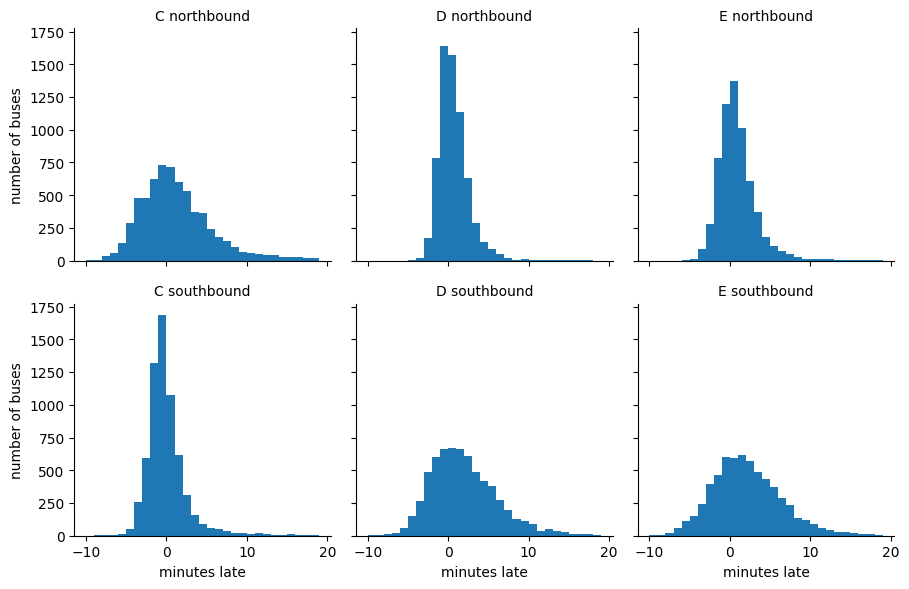

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, row="direction", col="route")
g.map(plt.hist, "minutes_late", bins=np.arange(-10, 20))
g.set_titles('{col_name} {row_name}')
g.set_axis_labels('minutes late', 'number of buses');